In [4]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db_name = "timescale"
db_user = "admin"
db_password = "TimescalePassword"
db_host = "localhost"
db_port = "5433"
database_uri = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(database_uri)
df = pd.read_sql("SELECT * FROM filteredsensordatagrid", engine)

In [5]:
import numpy as np
customer_counts = df['viikonpaiva'].value_counts().sort_index()
viikonpv = ["Maanantai", "Tiistai", "Keskiviikko", "Torstai", "Perjantai", "Lauantai", "Sunnuntai"]
df['kesto_minutes'] = pd.to_timedelta(df['kesto']).dt.total_seconds() / 60
average_durations = df.groupby('viikonpaiva')['kesto_minutes'].mean()
average_durations.round(2)
# perustuu olemassa olevaan dataan, ei ennustele mitään

viikonpaiva
0     6.07
1    10.33
2     5.77
3     8.76
4     7.54
5    10.31
6     7.55
Name: kesto_minutes, dtype: float64

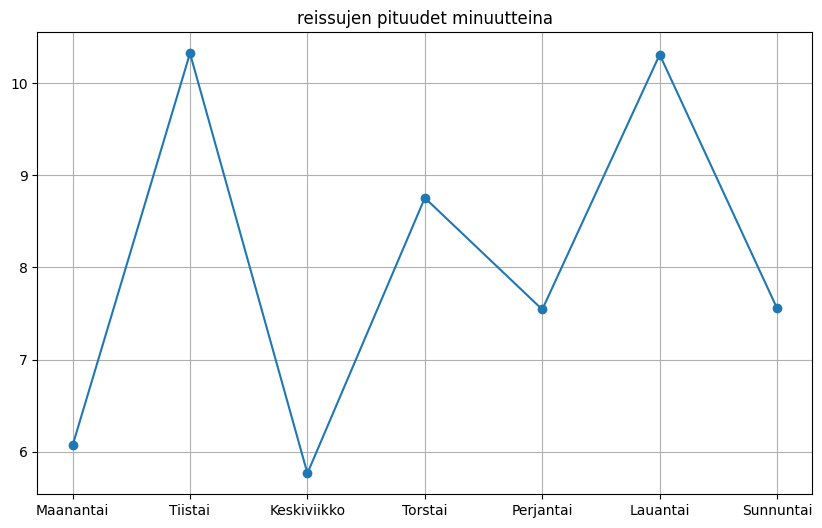

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(viikonpv, average_durations, marker='o')

plt.title('reissujen pituudet minuutteina')
plt.grid(True)

plt.show()
